In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from mpl_toolkits.mplot3d import Axes3D

In [3]:
## Black-sholes Model_Call option : 만기 기준 가격을 연속적으로 표현한 것
# Set_Rangevalue
sval = np.linspace(start = 0, stop = 100, num = 10)
tval = np.linspace(start = 0, stop = 1, num = 10)
k = 5
r= .05
sigma = .6
premium = np.zeros((10,10))

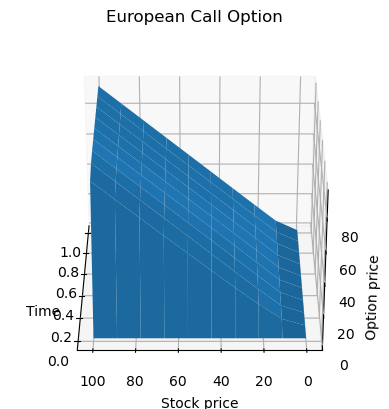

In [4]:
for i in range(1,10):
    s = sval[i]
    for j in range(1,10):
        t = tval[j]
        d1 = (np.log(s/k) + (r+0.5*sigma**2)*t)/sigma*np.sqrt(t)
        d2 = (np.log(s/k) + (r-0.5*sigma**2)*t)/sigma*np.sqrt(t)
        call = s*norm.cdf(d1) - k*np.exp(-r*t)*norm.cdf(d2)
        premium[i,j] = call
    

# 3차원 plot
tval, sval = np.meshgrid(tval, sval)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(tval, sval, premium)

# 그래프 라벨링 및 출력
ax.set_xlabel("Time")
ax.set_ylabel("Stock price")
ax.set_zlabel("Option price")
ax.set_title("European Call Option")
ax.view_init(elev=30, azim=180)
plt.show()

In [5]:
# Black-sholes Model_Call option : 유한차분법을 이용한 풀이
# Set_Rangevalue
sval = np.linspace(start = 0, stop = 100, num = 10)
tval = np.linspace(start = 0, stop = 1, num = 10)
k = 5
r= .05
sigma = .6
premium = np.zeros((10,10))

for j in range(1,10):
    s = sval[j]
    for i in range(1,10):
        t = tval[i]
        # 주가 0에서 콜옵션 0
        premium[1,j] = 0
        # 만기에서 콜옵션 Max[s-k,0]
        premium[10,j] = max(j-k,0)
        premium[i+1,j] = (r*t+1+sigma**2*j**2*t)*premium[i,j]+(0.5*sigma**2*j**2*t-r*t)premium[i,j+1]+(0.5*sigma**2*j**2*t+r*t)premium[i,j-1] 
        premium[i,j] = call
    

# 3차원 plot
sval, tval = np.meshgrid(sval, tval)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(sval, tval, premium)

# 그래프 라벨링 및 출력
ax.set_xlabel("Stock price")
ax.set_ylabel("Time")
ax.set_zlabel("Option price")
ax.set_title("European Call Option")
ax.view_init(elev=30, azim=180)
plt.show()

SyntaxError: invalid syntax (1906195232.py, line 18)

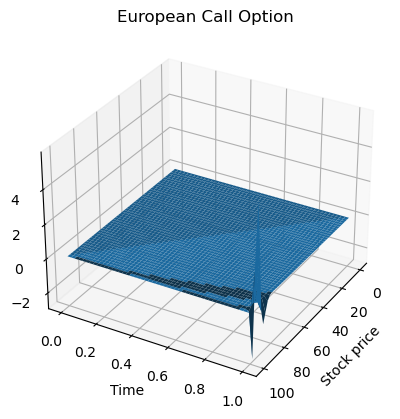

In [20]:
# Set_Rangevalue
sval = np.linspace(start=0, stop=100, num=50)
tval = np.linspace(start=0, stop=1, num=50)
k = 5
r = 0.05
sigma = 0.6
premium = np.zeros((50, 50))

# 초기 조건 설정
for j in range(50):
    premium[49, j] = max(sval[j] - k, 0)
    
# 경계 조건 설정
for i in range(50):
    premium[i, 0] = 0
    premium[i, 49] = sval[49] - k*np.exp(-r*t)

# 옵션 프리미엄 계산
for i in range(1, 49):
    for j in range(1, 49):
        s = sval[j]
        t = tval[i]
        dS = sval[1] - sval[0]
        dt = tval[1] - tval[0]
        
        # 주어진 유한차분 공식을 사용하여 옵션 프리미엄 계산
        premium[i+1, j] = (
            premium[i, j] +
            0.5 * sigma**2 * s**2 * premium[i, j] * dt +
            0.5 * r * s * (premium[i, j+1] - premium[i, j-1]) * dS -
            r * premium[i, j] * dt
        )

# 3차원 plot
sval, tval = np.meshgrid(sval, tval)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(sval, tval, premium)

# 그래프 라벨링 및 출력
ax.set_xlabel("Stock price")
ax.set_ylabel("Time")
ax.set_zlabel("Option price")
ax.set_title("European Call Option")
ax.view_init(elev=30, azim=30)
plt.show()